## Collaboration

### Form a team

Now we're going to get to the most important question of all with Git and GitHub: working with others.

Organise into pairs. You're going to be working on the website of one of the two of you, together, so decide who is going to be the leader, and who the collaborator.

### Giving permission

The leader needs to let the collaborator have the right to make changes to his code.

In GitHub, go to `Settings` on the right, then `Collaborators & teams` on the left.

Add the user name of your collaborator to the box. They now have the right to push to your repository.

### Obtaining a colleague's code

Next, the collaborator needs to get a copy of the leader's code. For this example notebook,
I'm going to be collaborating with myself, swapping between my two repositories.
Make yourself a space to put it your work. (I will have two)

In [1]:
import os
top_dir = os.getcwd()
git_dir = os.path.join(top_dir, 'learning_git')
working_dir = os.path.join(git_dir, 'git_example')
os.chdir(git_dir)

In [2]:
%%bash
pwd
rm -rf github-example # cleanup after previous example
rm -rf partner_dir # cleanup after previous example


/Users/jamespjh/devel/rsdt/rsd-engineeringcourse/ch02git/learning_git


Next, the collaborator needs to find out the URL of the repository: they should go to the leader's repository's GitHub page, and note the URL on the top of the screen. Make sure the "ssh" button is pushed, the URL should begin with `git@github.com`. 

Copy the URL into your clipboard by clicking on the icon to the right of the URL, and then:

In [1]:
%%bash
pwd
git clone https://${GITHUB_TOKEN}@github.com/alan-turing-institute/github-example.git
mv github-example partner_dir

/Users/giovannicolavizza/Dropbox/db_projects/Turing/rsd-engineeringcourse/ch02git


Cloning into 'github-example'...


In [4]:
partner_dir=os.path.join(git_dir, 'partner_dir')
os.chdir(partner_dir)

In [5]:
%%bash
pwd
ls

/Users/jamespjh/devel/rsdt/rsd-engineeringcourse/ch02git/learning_git/partner_dir
index.md
lakeland.md


Note that your partner's files are now present on your disk:

In [6]:
%%bash
cat lakeland.md

Lakeland  
  
Cumbria has some pretty hills, and lakes too

Mountains:
* Helvellyn

### Nonconflicting changes

Now, both of you should make some changes. To start with, make changes to *different* files. This will mean your work doesn't "conflict". Later, we'll see how to deal with changes to a shared file.

Both of you should commit, but not push, your changes to your respective files:

E.g., the leader:

In [7]:
os.chdir(working_dir)

In [8]:
%%writefile Wales.md
Mountains In Wales
==================

* Tryfan
* Yr Wyddfa

Writing Wales.md


In [9]:
%%bash
ls

Wales.md
index.md
lakeland.md
wsd.py
wsd.pyc


In [10]:
%%bash
git add Wales.md
git commit -m "Add wales"

[master d7d7243] Add wales
 1 file changed, 5 insertions(+)
 create mode 100644 Wales.md


And the partner:

In [11]:
os.chdir(partner_dir)

In [12]:
%%writefile Scotland.md
Mountains In Scotland
==================

* Ben Eighe
* Cairngorm

Writing Scotland.md


In [13]:
%%bash
ls

Scotland.md
index.md
lakeland.md


In [14]:
%%bash
git add Scotland.md
git commit -m "Add Scotland"

[master aed6a4d] Add Scotland
 1 file changed, 5 insertions(+)
 create mode 100644 Scotland.md


One of you should now push with `git push`:

In [15]:
%%bash
git push

To git@github.com:UCL/github-example.git
   79b1285..aed6a4d  master -> master


### Rejected push

The other should then push, but should receive an error message:

In [16]:
os.chdir(working_dir)

In [17]:
%%bash
git push

To git@github.com:UCL/github-example.git
 ! [rejected]        master -> master (fetch first)
error: failed to push some refs to 'git@github.com:UCL/github-example.git'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


Do as it suggests:

In [18]:
%%bash
git pull

Merge made by the 'recursive' strategy.
 Scotland.md | 5 +++++
 1 file changed, 5 insertions(+)
 create mode 100644 Scotland.md


From github.com:UCL/github-example
   79b1285..aed6a4d  master     -> origin/master
 * [new branch]      gh-pages   -> origin/gh-pages


### Merge commits

A window may pop up with a suggested default commit message. This commit is special: it is a *merge* commit. It is a commit which combines your collaborator's work with your own.

Now, push again with `git push`. This time it works. If you look on GitHub, you'll now see that it contains both sets of changes.

In [19]:
%%bash
git push

To git@github.com:UCL/github-example.git
   aed6a4d..4bc25e9  master -> master


The partner now needs to pull down that commit:

In [20]:
os.chdir(partner_dir)

In [21]:
%%bash
git pull

Updating aed6a4d..4bc25e9
Fast-forward
 Wales.md | 5 +++++
 1 file changed, 5 insertions(+)
 create mode 100644 Wales.md


From github.com:UCL/github-example
   aed6a4d..4bc25e9  master     -> origin/master


In [22]:
%%bash
ls

Scotland.md
Wales.md
index.md
lakeland.md


### Nonconflicted commits to the same file

Go through the whole process again, but this time, both of you should make changes to a single file, but make sure that you don't touch the same *line*. Again, the merge should work as before:

In [23]:
%%writefile Wales.md
Mountains In Wales
==================

* Tryfan
* Snowdon

Overwriting Wales.md


In [24]:
%%bash
git diff

diff --git i/Wales.md w/Wales.md
index 3809c69..e2ca555 100644
--- i/Wales.md
+++ w/Wales.md
@@ -2,4 +2,4 @@ Mountains In Wales
 
 * Tryfan
-* Yr Wyddfa
\ No newline at end of file
+* Snowdon
\ No newline at end of file


In [25]:
%%bash
git commit -am "Translating from the Welsh"

[master b7eba49] Translating from the Welsh
 1 file changed, 1 insertion(+), 1 deletion(-)


In [26]:
%%bash
git log --oneline

b7eba49 Translating from the Welsh
4bc25e9 Merge branch 'master' of github.com:UCL/github-example
d7d7243 Add wales
aed6a4d Add Scotland
79b1285 Add Helvellyn
cdd35b8 Include lakes in the scope
76322e5 Add lakeland
e533bb0 Revert "Add a lie about a mountain"
972c8ed Change title
04ada3b Add a lie about a mountain
03915a3 First commit of discourse on UK topography


In [27]:
os.chdir(working_dir)

In [28]:
%%writefile Wales.md
Mountains In Wales
==================

* Pen y Fan
* Tryfan
* Snowdon

Overwriting Wales.md


In [29]:
%%bash
git commit -am "Add a beacon"

[master b3d5585] Add a beacon
 1 file changed, 2 insertions(+), 1 deletion(-)


In [30]:
%%bash
git log --oneline

b3d5585 Add a beacon
4bc25e9 Merge branch 'master' of github.com:UCL/github-example
d7d7243 Add wales
aed6a4d Add Scotland
79b1285 Add Helvellyn
cdd35b8 Include lakes in the scope
76322e5 Add lakeland
e533bb0 Revert "Add a lie about a mountain"
972c8ed Change title
04ada3b Add a lie about a mountain
03915a3 First commit of discourse on UK topography


In [31]:
%%bash
git push

To git@github.com:UCL/github-example.git
   4bc25e9..b3d5585  master -> master


Switching back to the other partner...

In [32]:
os.chdir(partner_dir)

In [33]:
%%bash
git push

To git@github.com:UCL/github-example.git
 ! [rejected]        master -> master (fetch first)
error: failed to push some refs to 'git@github.com:UCL/github-example.git'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


In [34]:
%%bash
git pull

Merge made by the 'recursive' strategy.
 Wales.md | 1 +
 1 file changed, 1 insertion(+)


From github.com:UCL/github-example
   4bc25e9..b3d5585  master     -> origin/master


In [35]:
%%bash
git push

To git@github.com:UCL/github-example.git
   b3d5585..54a5484  master -> master


In [36]:
%%bash
git log --oneline --graph

*   54a5484 Merge branch 'master' of github.com:UCL/github-example
|\  
| * b3d5585 Add a beacon
* | b7eba49 Translating from the Welsh
|/  
*   4bc25e9 Merge branch 'master' of github.com:UCL/github-example
|\  
| * aed6a4d Add Scotland
* | d7d7243 Add wales
|/  
* 79b1285 Add Helvellyn
* cdd35b8 Include lakes in the scope
* 76322e5 Add lakeland
* e533bb0 Revert "Add a lie about a mountain"
* 972c8ed Change title
* 04ada3b Add a lie about a mountain
* 03915a3 First commit of discourse on UK topography


In [37]:
os.chdir(working_dir)

In [38]:
%%bash
git pull

Updating b3d5585..54a5484
Fast-forward


From github.com:UCL/github-example
   b3d5585..54a5484  master     -> origin/master


In [39]:
%%bash
git log --graph --oneline

*   54a5484 Merge branch 'master' of github.com:UCL/github-example
|\  
| * b3d5585 Add a beacon
* | b7eba49 Translating from the Welsh
|/  
*   4bc25e9 Merge branch 'master' of github.com:UCL/github-example
|\  
| * aed6a4d Add Scotland
* | d7d7243 Add wales
|/  
* 79b1285 Add Helvellyn
* cdd35b8 Include lakes in the scope
* 76322e5 Add lakeland
* e533bb0 Revert "Add a lie about a mountain"
* 972c8ed Change title
* 04ada3b Add a lie about a mountain
* 03915a3 First commit of discourse on UK topography


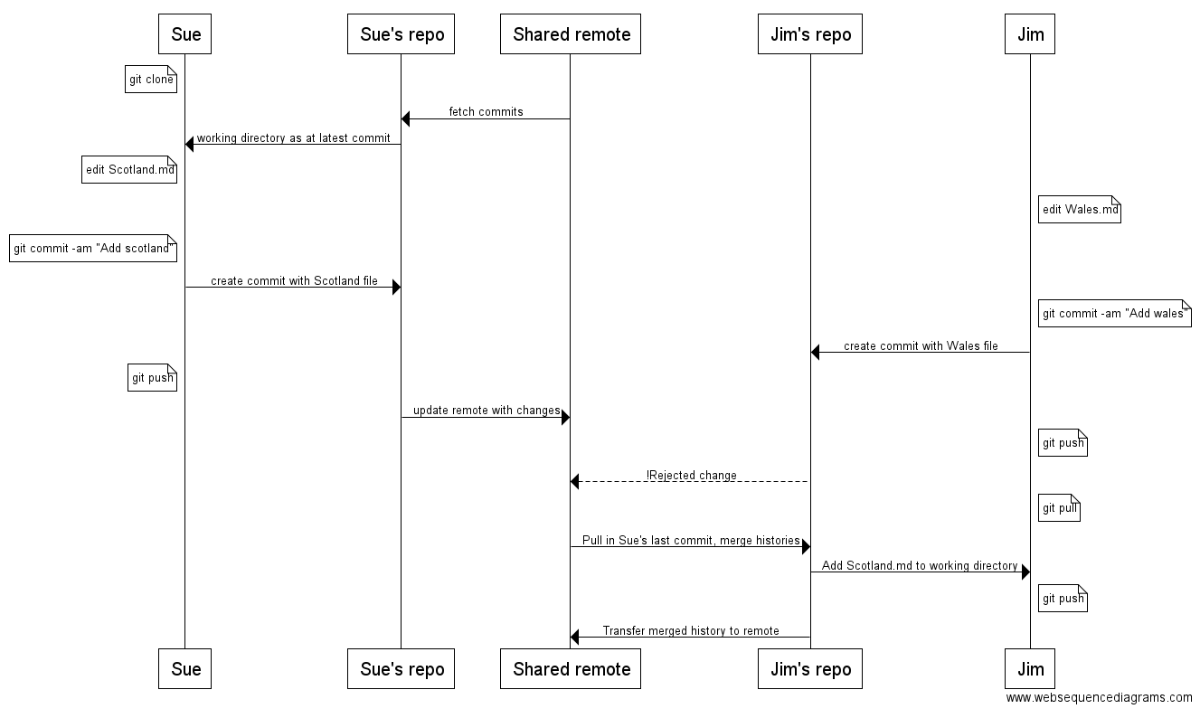

In [40]:
message="""
participant Sue as S
participant "Sue's repo" as SR
participant "Shared remote" as M
participant "Jim's repo" as JR
participant Jim as J

note left of S: git clone
M->SR: fetch commits
SR->S: working directory as at latest commit

note left of S: edit Scotland.md
note right of J: edit Wales.md

note left of S: git commit -am "Add scotland"
S->SR: create commit with Scotland file

note right of J: git commit -am "Add wales"
J->JR: create commit with Wales file

note left of S: git push
SR->M: update remote with changes

note right of J: git push
JR-->M: !Rejected change

note right of J: git pull
M->JR: Pull in Sue's last commit, merge histories
JR->J: Add Scotland.md to working directory

note right of J: git push
JR->M: Transfer merged history to remote

"""
from wsd import wsd
%matplotlib inline
wsd(message)

### Conflicting commits

Finally, go through the process again, but this time, make changes which touch the same line.

In [41]:
%%writefile Wales.md
Mountains In Wales
==================

* Pen y Fan
* Tryfan
* Snowdon
* Fan y Big

Overwriting Wales.md


In [42]:
%%bash
git commit -am "Add another Beacon"
git push

[master 3c4a02f] Add another Beacon
 1 file changed, 2 insertions(+), 1 deletion(-)


To git@github.com:UCL/github-example.git
   54a5484..3c4a02f  master -> master


In [43]:
os.chdir(partner_dir)

In [44]:
%%writefile Wales.md
Mountains In Wales
==================

* Pen y Fan
* Tryfan
* Snowdon
* Glyder Fawr

Overwriting Wales.md


In [45]:
%%bash
git commit -am "Add Glyder"
git push

[master a5f66ac] Add Glyder
 1 file changed, 2 insertions(+), 1 deletion(-)


To git@github.com:UCL/github-example.git
 ! [rejected]        master -> master (fetch first)
error: failed to push some refs to 'git@github.com:UCL/github-example.git'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


When you pull, instead of offering an automatic merge commit message, it says:

In [46]:
%%bash
git pull

CONFLICT (content): Merge conflict in Wales.md
Automatic merge failed; fix conflicts and then commit the result.


From github.com:UCL/github-example
   54a5484..3c4a02f  master     -> origin/master
Recorded preimage for 'Wales.md'


### Resolving conflicts

Git couldn't work out how to merge the two different sets of changes.

You now need to manually resolve the conflict.

It has marked the conflicted area:

In [47]:
%%bash
cat Wales.md

Mountains In Wales

* Pen y Fan
* Tryfan
* Snowdon
<<<<<<< HEAD
* Glyder Fawr
* Fan y Big
>>>>>>> 3c4a02fdbaaa1e2a2af2bf62f9e08ac5ded2b374


Manually edit the file, to combine the changes as seems sensible and get rid of the symbols:

In [48]:
%%writefile Wales.md
Mountains In Wales
==================

* Pen y Fan
* Tryfan
* Snowdon
* Glyder Fawr
* Fan y Big

Overwriting Wales.md


### Commit the resolved file

Now commit the merged result:

In [49]:
%%bash
git commit -a --no-edit # I added a No-edit for this non-interactive session. You can edit the commit if you like.

[master 5f73fff] Merge branch 'master' of github.com:UCL/github-example


Recorded resolution for 'Wales.md'.


In [50]:
%%bash
git push

To git@github.com:UCL/github-example.git
   3c4a02f..5f73fff  master -> master


In [51]:
os.chdir(working_dir)

In [52]:
%%bash
git pull

Updating 3c4a02f..5f73fff
Fast-forward
 Wales.md | 1 +
 1 file changed, 1 insertion(+)


From github.com:UCL/github-example
   3c4a02f..5f73fff  master     -> origin/master


In [53]:
%%bash
cat Wales.md

Mountains In Wales

* Pen y Fan
* Tryfan
* Snowdon
* Glyder Fawr
* Fan y Big

In [54]:
%%bash
git log --oneline --graph

*   5f73fff Merge branch 'master' of github.com:UCL/github-example
|\  
| * 3c4a02f Add another Beacon
* | a5f66ac Add Glyder
|/  
*   54a5484 Merge branch 'master' of github.com:UCL/github-example
|\  
| * b3d5585 Add a beacon
* | b7eba49 Translating from the Welsh
|/  
*   4bc25e9 Merge branch 'master' of github.com:UCL/github-example
|\  
| * aed6a4d Add Scotland
* | d7d7243 Add wales
|/  
* 79b1285 Add Helvellyn
* cdd35b8 Include lakes in the scope
* 76322e5 Add lakeland
* e533bb0 Revert "Add a lie about a mountain"
* 972c8ed Change title
* 04ada3b Add a lie about a mountain
* 03915a3 First commit of discourse on UK topography


### Distributed VCS in teams with conflicts

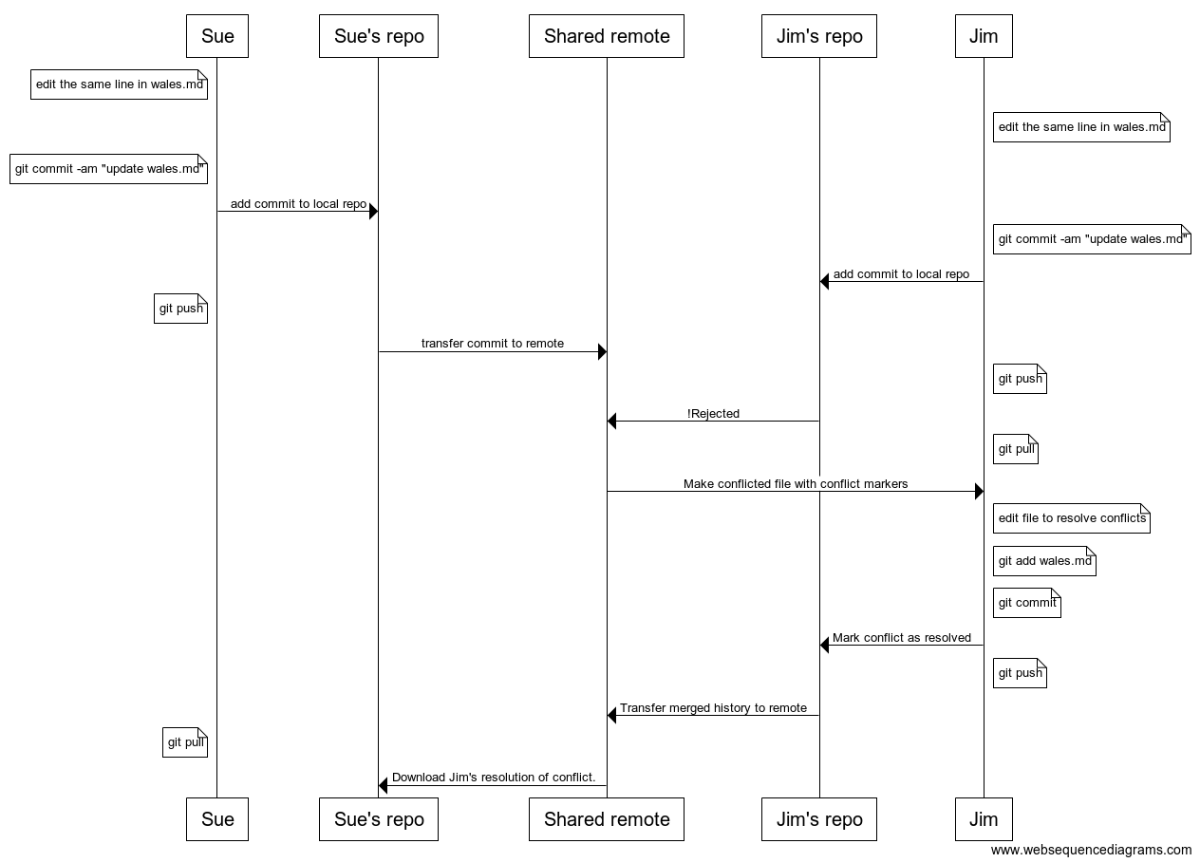

In [55]:
message="""
participant Sue as S
participant "Sue's repo" as SR
participant "Shared remote" as M
participant "Jim's repo" as JR
participant Jim as J

note left of S: edit the same line in wales.md
note right of J: edit the same line in wales.md
    
note left of S: git commit -am "update wales.md"
S->SR: add commit to local repo
    
note right of J: git commit -am "update wales.md"
J->JR: add commit to local repo
    
note left of S: git push
SR->M: transfer commit to remote
    
note right of J: git push
JR->M: !Rejected

note right of J: git pull
M->J: Make conflicted file with conflict markers
    
note right of J: edit file to resolve conflicts
note right of J: git add wales.md
note right of J: git commit
J->JR: Mark conflict as resolved

note right of J: git push
JR->M: Transfer merged history to remote

note left of S: git pull
M->SR: Download Jim's resolution of conflict.
    
"""

wsd(message)

### The Levels of Git

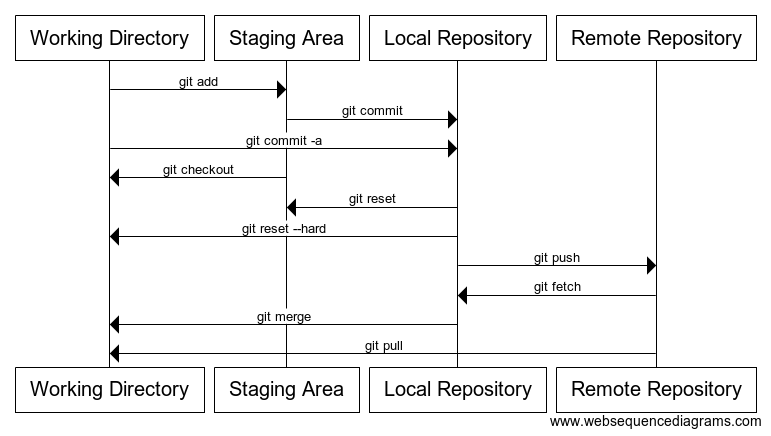

In [56]:
message="""
Working Directory -> Staging Area : git add
Staging Area -> Local Repository : git commit
Working Directory -> Local Repository : git commit -a
Staging Area -> Working Directory : git checkout
Local Repository -> Staging Area : git reset
Local Repository -> Working Directory: git reset --hard
Local Repository -> Remote Repository : git push
Remote Repository -> Local Repository : git fetch
Local Repository -> Working Directory : git merge
Remote Repository -> Working Directory: git pull
"""

wsd(message)

## Editing directly on GitHub

### Editing directly on GitHub

Note that you can also make changes in the GitHub website itself. Visit one of your files, and hit "edit".

Make a change in the edit window, and add an appropriate commit message.

That change now appears on the website, but not in your local copy. (Verify this). 

Now pull, and check the change is now present on your local version. 

## Social Coding

### GitHub as a social network

In addition to being a repository for code, and a way to publish code, GitHub is a social network.  

You can follow the public work of other coders: go to the profile of your collaborator in your browser, and hit the "follow" button. 

[Here's mine](https://github.com/jamespjh) : if you want to you can follow me.

Using GitHub to build up a good public profile of software projects you've worked on is great for your CV!